# Tweet sentiment analysis


In [1]:
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

## 1.Get dataframe from csv file

In [2]:
# Read CSV file
#tweets_today = pd.read_csv(r"C:\stage\project\datasets\tweets{}.csv".format(datetime.date.today()))
tweets_today = pd.read_csv(r"C:\stage\project\datasets\tweets2019-09-24.csv")
tweets_today = tweets_today.head(5000)
# Gets tweet texts
tweets_today_text = tweets_today["tweet"]
tweets_today.tail(50)

,tweet,username,creation date
4950,ananavarro what is the world coming to when w...,Derek Renfro,2019-09-24 11:44:00
4951,tonyposnanski if this isnt further proof that...,🤷🏽‍♀️Tonja Simone’ 🏁,2019-09-24 11:43:58
4952,the energy industry is continuing to fight cl...,Mahesh Narayanan,2019-09-24 11:43:57
4953,new book choice daywhich should i read first ...,Justin Leveque™,2019-09-24 11:43:56
4954,dailycaller climate change is a trick they wa...,Katharine Oda,2019-09-24 11:43:56
4955,marcherlord1 its not warming any more its cli...,"Daniel Lawson, Esq.",2019-09-24 11:43:53
4956,washingtonpost ask her if shes being abused o...,Skane,2019-09-24 11:43:53
4957,alamocitylib benshapiro hypothetical is someo...,Marissa,2019-09-24 11:43:52
4958,shes just 16 years old but her wisdom is more...,Keval Gokani,2019-09-24 11:43:52
4959,goflutter1 2020notorious dude do the math and...,YANG ahead of his time 🧢,2019-09-24 11:43:50


## 2. Preprocessing

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
documents = []
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

def filter_stopwords(word):
    if word in stopwords.words('english'):
        return False
    else:
        return True

# Extract tweet column from df
df_text = tweets_today["tweet"]

for tweet in df_text:
    document = tweet.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = filter(filter_stopwords,document)
    document = ' '.join(document)
    documents.append(document)
print(documents[555])
print(len(documents))

saracarterdc tuckercarlson ridiculous hyperbole soul certainly safe climate change
5000


In [5]:
# tfidf = term frequency, inverse document frequency ()
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.80)
processed_features = vectorizer.fit_transform(documents).toarray()
print(processed_features.shape)

(5000, 2000)


## 3.Clustering with K-means algorithm

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=1000, tol=1e-04, random_state=1)
y_km = km.fit_predict(processed_features)
print(y_km)

[1 1 2 ... 1 1 1]


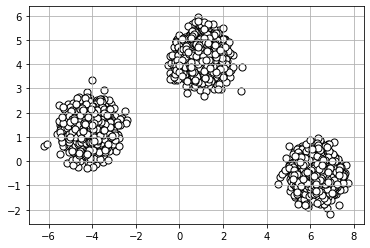

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=5000, n_features=2000, centers=3, cluster_std=0.5, shuffle= True, random_state=0)

plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.show()

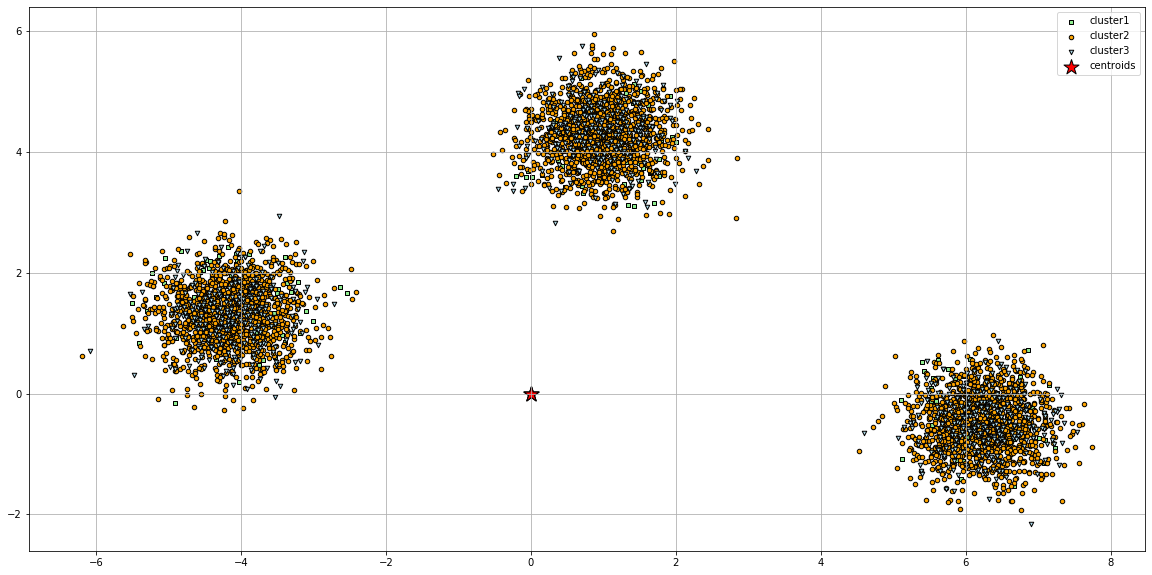

In [8]:
plt.figure(figsize=(20,10))

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=20, c='lightgreen', marker='s', edgecolor='black', label='cluster1' )
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=20, c='orange', marker='o', edgecolor='black', label='cluster2' )
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=20, c='lightblue', marker='v', edgecolor='black', label='cluster3' )
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor="black", label="centroids")

plt.legend(scatterpoints=1)
plt.grid()

As you can see this clustering algorithm didn't work well. The problem is that with unsupervised learning for sentiment analysis there is no clear threshhold for the algorithm to separate the points from eachother

## 4.Applying Naive Bayes algorithm to the dataframe